# Model Selection and Variable importance

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the cleaned datasets
train = pd.read_csv('train_clean.csv')
test = pd.read_csv('test_clean.csv')
#
# Check The Shape Of The Data Loaded
print('Train data shape: {} Rows, {} Columns'.format(*train.shape))
print('Test data shape: {} Rows, {} Columns'.format(*test.shape))

Train data shape: 4476738 Rows, 46 Columns
Test data shape: 1939722 Rows, 45 Columns


## Feature Importance

In [3]:
# modelling 
import lightgbm as lgb
#
# utilities
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [4]:
y = train[['target']].astype(int)
#label encode
lab_enc = LabelEncoder()
y = lab_enc.fit_transform(y)
#
X = train.drop(['target', 'client_id'], axis=1)
display(X.head(2))

,region,tarif_type,counter_number,counter_statue,counter_code,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,...,counter_number_freq_code,counter_code_freq_code,counter_coefficient_freq_code,counter_statue_freq_code,creation_month_freq_code,creation_year_freq_code,creation_day_freq_code,invoice_month_freq_code,invoice_year_freq_code,invoice_day_freq_code
0,0,3,200222,0,12,1,-0.462083,-0.094382,-0.11213,-0.060633,...,35,2173804,6413976,6244643,934805,156341,286996,577032,492576,209365
1,0,3,200222,0,12,1,1.103001,0.061340,-0.11213,-0.060633,...,35,2173804,6413976,6244643,934805,156341,286996,577032,481639,160026


In [5]:
# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='binary', 
                           boosting_type = 'goss', 
                           n_estimators = 1000, 
                           class_weight = 'balanced')
#
# Split into training and validation set
train_features, valid_features, train_y, valid_y = train_test_split(X, y, test_size = 0.3, random_state = 27)
# Train using early stopping
model.fit(train_features, train_y, 
          eval_metric = 'binary_logloss', 
          verbose = 20)

LGBMClassifier(boosting_type='goss', class_weight='balanced', n_estimators=1000,
               objective='binary')

## Percentage feature Importance

In [6]:
#define a function to create variable importance dataframe
def get_lgbm_varimp(model, train_columns, max_vars=50):
    
    # Scikit-learn API LGBMClassifier or LGBMRegressor was fitted, 
    # so using feature_importances_ property
    feature_importances_perc = (model.feature_importances_ / sum(model.feature_importances_)) * 100 
    cv_varimp_df = pd.DataFrame([train_columns, feature_importances_perc]).T

    cv_varimp_df.columns = ['feature_name', 'varimp (%)']

    cv_varimp_df.sort_values(by='varimp (%)', ascending=False, inplace=True)

    cv_varimp_df = cv_varimp_df.iloc[0:max_vars]   

    return cv_varimp_df

In [7]:
train_names = ['region', 'tarif_type', 'counter_number', 'counter_statue',
       'counter_code', 'counter_coefficient', 'consommation_level_1',
       'consommation_level_2', 'consommation_level_3', 'consommation_level_4',
       'old_index', 'new_index', 'months_number', 'disrict_62', 'disrict_63',
       'disrict_69', 'client_catg_12', 'client_catg_51', 'reading_remarque_6',
       'reading_remarque_7', 'reading_remarque_8', 'reading_remarque_9',
       'reading_remarque_203', 'reading_remarque_207', 'reading_remarque_413',
       'counter_type_GAZ', 'creation_year', 'creation_month', 'creation_day',
       'invoice_year', 'invoice_month', 'invoice_day', 'region_freq_code',
       'tarif_type_freq_code', 'counter_number_freq_code',
       'counter_code_freq_code', 'counter_coefficient_freq_code',
       'counter_statue_freq_code', 'creation_month_freq_code',
       'creation_year_freq_code', 'creation_day_freq_code',
       'invoice_month_freq_code', 'invoice_year_freq_code',
       'invoice_day_freq_code']
#
get_lgbm_varimp(model, train_names)

,feature_name,varimp (%)
34,counter_number_freq_code,14.41
2,counter_number,13.2367
26,creation_year,9.14
28,creation_day,8.29333
39,creation_year_freq_code,7.46667
40,creation_day_freq_code,7.00667
27,creation_month,6.40667
0,region,6.04
32,region_freq_code,5.3
38,creation_month_freq_code,2.77


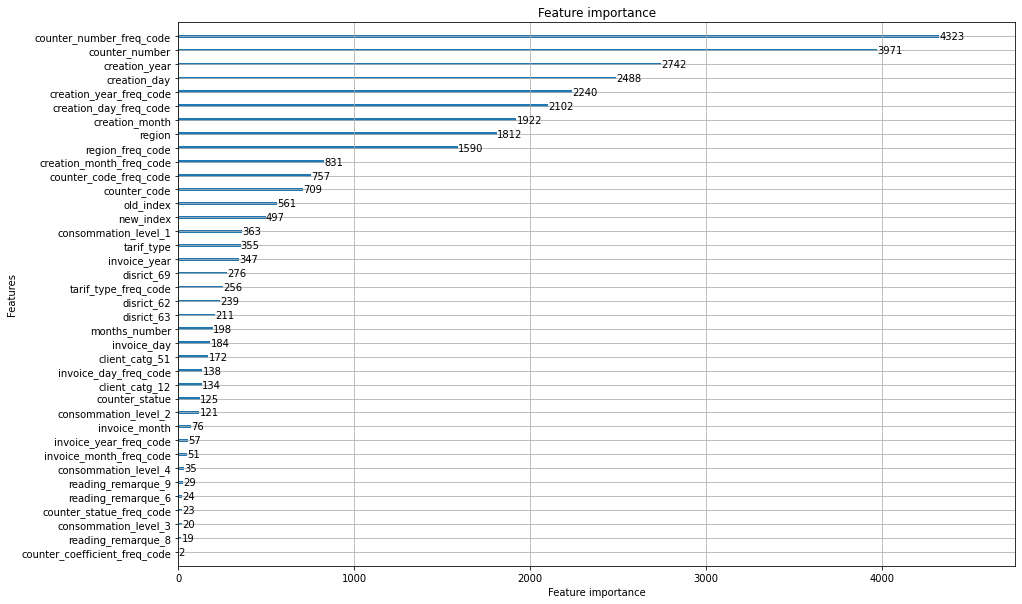

In [8]:
#plot the variable importance
import matplotlib.pyplot as plt 
%matplotlib inline
ax=lgb.plot_importance(model, max_num_features=40, figsize=(15,10))
plt.show()

In [9]:
#drop irrelevant columns/variables from X features
columns = ['counter_coefficient', 'counter_type_GAZ', 'reading_remarque_413', 'reading_remarque_7','reading_remarque_207', 
           'reading_remarque_203']
#
X.drop(columns, inplace=True, axis=1)

### Check for imbalance in the target variable

Class=0, n=4123629 (92.112%)
Class=1, n=353109 (7.888%)


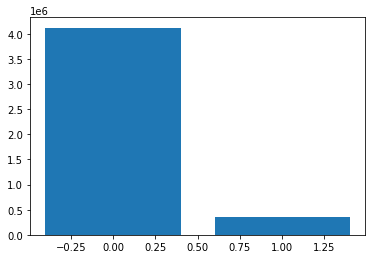

In [10]:
from collections import Counter
import matplotlib.pyplot as plt
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
#
#plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

One class has more observations than the other, balancing the data would normalise significant the difference in classes

In [11]:
# #oversample the data to balance the target variable
# from imblearn.over_sampling import SMOTE
# # transform the dataset
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)

In [12]:
# from collections import Counter
# import matplotlib.pyplot as plt
# # summarize distribution
# counter = Counter(y)
# for k,v in counter.items():
#     per = v / len(y) * 100
#     print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# #plot the distribution
# plt.bar(counter.keys(), counter.values())
# plt.show()

## Model Selection

Calculate the baseline acacuracy

In [13]:
#split model
import random
random.seed(1234)
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
#
#model the training set and calculate the metrics
clf = lgb.LGBMClassifier().fit(x_train, y_train)
#
from sklearn.metrics import log_loss, accuracy_score
print('Log Loss: ', log_loss(y_valid, clf.predict_proba(x_valid)))
print('Accuracy: ', accuracy_score(y_valid, clf.predict(x_valid)))

Log Loss:  0.23665611138909623
Accuracy:  0.9233348374040038


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier #Neural networks
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss, accuracy_score
#
models = [
    RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0),
    SVC(decision_function_shape="ovr"),
    LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr'),
    AdaBoostClassifier(),
    CatBoostClassifier(iterations=300, depth=6, learning_rate=0.1, logging_level='Silent',
                        eval_metric='Accuracy', random_state=42),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(objective='binary:logistic', loss_function='Logloss', eval_metric='logloss', learning_rate=0.1, max_depth=4, 
                  seed=27, n_estimators=20),
    lgb.LGBMClassifier(objective='binary', 
                           boosting_type = 'goss', 
                           n_estimators = 1000, 
                           class_weight = 'balanced'),
    MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1),
    DecisionTreeClassifier(max_depth = 2)
]
#
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
print(cv_df.groupby('model_name').accuracy.mean().sort_values())

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

## 1. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1500, class_weight='balanced')
rf.fit(x_train, y_train)
#
rf_pred=rf.predict(x_valid)
#
print('Log Loss: ', log_loss(y_valid, rf.predict_proba(x_valid)))
print("Accuracy:", accuracy_score(y_valid, rf_pred))
#
from sklearn.metrics import mean_squared_error, classification_report
mse=mean_squared_error(y_valid, rf_pred)
print('RandomForest-RMSE: ', np.sqrt(mse))
#
#classification Report
print(classification_report(y_valid, rf_pred))

## 2. LightGBM Classifier

In [ ]:
import lightgbm as lgb
lgbm=lgb.LGBMClassifier(objective='binary', 
                           boosting_type = 'goss', 
                           n_estimators = 1000, 
                           class_weight = 'balanced')
lgbm.fit(x_train, y_train)
#
lgbm_pred=lgbm.predict(x_valid)
#
print('Log Loss: ', log_loss(y_valid, lgbm.predict_proba(x_valid)))
print("Accuracy:", accuracy_score(y_valid, lgbm_pred))
#
from sklearn.metrics import mean_squared_error, classification_report
mse=mean_squared_error(y_valid, lgbm_pred)
print('RandomForest-RMSE: ', np.sqrt(mse))
#
#classification Report
print(classification_report(y_valid, lgbm_pred))

## 3. Catboost Classifier

In [ ]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier(iterations=300, depth=6, learning_rate=0.1, logging_level='Silent',
                        eval_metric='Accuracy', random_state=42)
cat.fit(x_train, y_train)
#
cat_pred=cat.predict(x_valid)
#
print('Log Loss: ', log_loss(y_valid, cat.predict_proba(x_valid)))
print("Accuracy:", accuracy_score(y_valid, cat_pred))
#
from sklearn.metrics import mean_squared_error, classification_report
mse=mean_squared_error(y_valid, cat_pred)
print('RandomForest-RMSE: ', np.sqrt(mse))
#
#classification Report
print(classification_report(y_valid, cat_pred))

### Predict Test Data

In [ ]:
#drop irrelevant columns/variables from X features
columns = ['counter_coefficient', 'counter_type_GAZ', 'reading_remarque_413', 'reading_remarque_7','reading_remarque_207', 
           'reading_remarque_203', 'client_id']
#
test.drop(columns, inplace=True, axis=1)